## Detail to Scikit-Learn
This notebook demonstrate the some of the useful function in scikitlearn
This section just shows the descriptive way of each of the steps to be covered.

Topics covered:
1. An end to end scikit learn workflow
2. Getting the data ready
3. Choose the right estimator/algorithm
4. Fit the model/algorithm and use it to make prediction
5. Evaluating a model
6. Improve the model
7. Save and load a trained model
8. Putting it all together

# 1. An end to end scikit learn workflow

In [253]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Getting the data ready
Getting our data for the ML models:

Three main things:

    2.1. Spilts the data to train and test(X&Y)
    2.2. Filling(called as imputing) or disregarding missing values
    2.3. Converting non-numeric to numeric(feature encoding)

In [4]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# Taking the feature column in X except target(i.e label Y)
x= heart_disease.drop("target",axis=1)

# Taking the target in y as label
y=heart_disease["target"]
x.head(),y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [6]:
# In machine learning the most fundamental principle is to split the data into Train and test
# 2.1 Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# test_size indicated the % of the data for test data

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Making sure all data is numeric

In [8]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [9]:
len(car_sales),car_sales.dtypes

(1000,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [10]:
# Split the data (X & Y)
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# Splitting to train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
# Build the Model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Honda'

Machine Learning model can't deals with the string value.

Lets fix this now:::

In [12]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features= ["Make","Colour","Doors"]  #columns to be transformed
one_hot=OneHotEncoder()  #OneHot encoded of columns
transformer=ColumnTransformer([("one_hot",
                             one_hot,
                             categorical_features)],
                             remainder="passthrough")   
#Column transformer takes onehotencoder and apply to the categorical features
# We encoded the str columns to numeric to 0s and 1s
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [13]:
pd.DataFrame(transformed_x)

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [14]:
# View dummies
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies


Doors  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  Colour_Black  \
0        4         0           1            0            0             0   
1        5         1           0            0            0             0   
2        4         0           1            0            0             0   
3        4         0           0            0            1             0   
4        3         0           0            1            0             0   
..     ...       ...         ...          ...          ...           ...   
995      4         0           0            0            1             1   
996      3         0           0            1            0             0   
997      4         0           0            1            0             0   
998      4         0           1            0            0             0   
999      4         0           0            0            1             0   

     Colour_Blue  Colour_Green  Colour_Red  Colour_White  
0              0             0           0             1  
1              1             0           0             0  
2              0             0           0             1  
3              0             0           0             1  
4              1             0           0             0  
..           ...           ...         ...           ...  
995            0             0           0             0  
996            0             0           0             1  
997            1             0           0             0  
998            0             0           0             1  
999            1             0           0             0  

[1000 rows x 10 columns]

In [15]:
# Now let's refit the model
np.random.seed(42)   #To make result reproducible
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
model.score(x_test,y_test)

0.3235867221569877

In [17]:
# What if there were the missing values in the dateset
# there are tow main ways:
# 1. fill with some values (imputation)
# 2. remove the samples with missing data altogether
# Note: there is no absolute way to handle missing data, 
# Filling can add non real data and removing can reduce the datesret


In [18]:
# Import car sales missing data
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

In [19]:
# Viewing total missing data in each column
car_sales_missing.isna().sum(),car_sales_missing.shape

(Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64,
 (1000, 5))

We do can use the onehot encoding to transform the data to numeric. But there's the missing value.
Although the onehot encoding has feature to ignore the missing value(NaN) it's not the right way to handle such. 
So, we'll handle the missing value first and proceed further.

# 2.1. Filling the Column (Using pandas)

In [20]:
# car_sales_missing.dropna(subset=["Price"],inplace=True)
# car_sales_missing.isna().sum(),car_sales_missing.shape

In [21]:
# Fill each column
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)


In [22]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Remove the rows with missing price values
car_sales_missing.dropna(inplace=True)

In [24]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [25]:
len(car_sales_missing)

950

In [26]:
# taking the data
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [27]:
# Transforming the data:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features= ["Make","Colour","Doors"]  #columns to be transformed
one_hot=OneHotEncoder()  #OneHot encoded of columns
transformer=ColumnTransformer([("one_hot",
                             one_hot,
                             categorical_features)],
                             remainder="passthrough")   
#Column transformer takes onehotencoder and apply to the categorical features
# We encoded the str columns to numeric to 0s and 1s
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [28]:
# View the transformed_x
pd.DataFrame(transformed_x)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4    0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
945  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
946  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
947  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
948  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
949  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

           14       15  
0     35431.0  15323.0  
1    192714.0  19943.0  
2     84714.0  28343.0  
3    154365.0  13434.0  
4    181577.0  14043.0  
..        ...      ...  
945   35820.0  32042.0  
946  155144.0   5716.0  
947   66604.0  31570.0  
948  215883.0   4001.0  
949  248360.0  12732.0  

[950 rows x 16 columns]

In [29]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9998421058539825

# 2.2. Filling the Column (Using Sklearn)

In [30]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

Make Colour  Odometer (KM)  Doors    Price
0     Honda  White        35431.0    4.0  15323.0
1       BMW   Blue       192714.0    5.0  19943.0
2     Honda  White        84714.0    4.0  28343.0
3    Toyota  White       154365.0    4.0  13434.0
4    Nissan   Blue       181577.0    3.0  14043.0
..      ...    ...            ...    ...      ...
995  Toyota  Black        35820.0    4.0  32042.0
996     NaN  White       155144.0    3.0   5716.0
997  Nissan   Blue        66604.0    4.0  31570.0
998   Honda  White       215883.0    4.0   4001.0
999  Toyota   Blue       248360.0    4.0  12732.0

[1000 rows x 5 columns]

In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# Split into the subset
# Drop the rows with no labesl
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [33]:
# Split data into X & Y
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [34]:
# Fill value using sklearn
# Filling value is also called as imputation
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical features with 'missing' & numerical with 'mean'
categorical_imputer = SimpleImputer(strategy="constant",fill_value="missing") # Make and colour
door_imputer = SimpleImputer(strategy="constant",fill_value=4)  #Doors
num_imputer = SimpleImputer(strategy="mean")   # Odometer
# imputers are just filling missing data using simple transfmer
# constanly fill the data with the missing,4 & mean if missing data are found

# define columns
categorical_features =["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("categorical_imputer" , categorical_imputer,categorical_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])  # ColumnTransformer same as previous way, use CT in above features with fillna

# transform the data : just trasformation
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [35]:
# view the filled_x
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

Make Colour Doors Odometer (KM)
0      Honda  White   4.0       35431.0
1        BMW   Blue   5.0      192714.0
2      Honda  White   4.0       84714.0
3     Toyota  White   4.0      154365.0
4     Nissan   Blue   3.0      181577.0
..       ...    ...   ...           ...
945   Toyota  Black   4.0       35820.0
946  missing  White   3.0      155144.0
947   Nissan   Blue   4.0       66604.0
948    Honda  White   4.0      215883.0
949   Toyota   Blue   4.0      248360.0

[950 rows x 4 columns]

In [36]:
# see is there any missing value now??
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [37]:
car_sales_filled.shape

(950, 4)

In [38]:
# converting data to numeric( str and categorical datas)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder()
categorical_features = ["Make","Colour","Doors"]
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough"
                    
                               )
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [39]:
pd.DataFrame(transformed_x)

0
0      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
1      (0, 0)\t1.0\n  (0, 6)\t1.0\n  (0, 13)\t1.0\n...
2      (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
3      (0, 3)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
4      (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 11)\t1.0\n...
..                                                 ...
945    (0, 3)\t1.0\n  (0, 5)\t1.0\n  (0, 12)\t1.0\n...
946    (0, 4)\t1.0\n  (0, 9)\t1.0\n  (0, 11)\t1.0\n...
947    (0, 2)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...
948    (0, 1)\t1.0\n  (0, 9)\t1.0\n  (0, 12)\t1.0\n...
949    (0, 3)\t1.0\n  (0, 6)\t1.0\n  (0, 12)\t1.0\n...

[950 rows x 1 columns]

In [40]:
len(car_sales_filled),len(car_sales)

(950, 1000)

In [44]:
# Fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                 y,
                                                 test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

Now comapre the accuracy of 'Filling data with pandas' & 'Filling data with sklearn'.
Notice that here accuracy is low.

# 3. Choose the right estimator/algorithm

Sklearn uses estimator used another term for Machine Learning model or algorithm.

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.

The flowchart below is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data.

Mainly:

1.Classification - Predicting wether a sample is one thing or another

2.Regression - Predicting a number

https://scikit-learn.org/stable/_static/ml_map.png

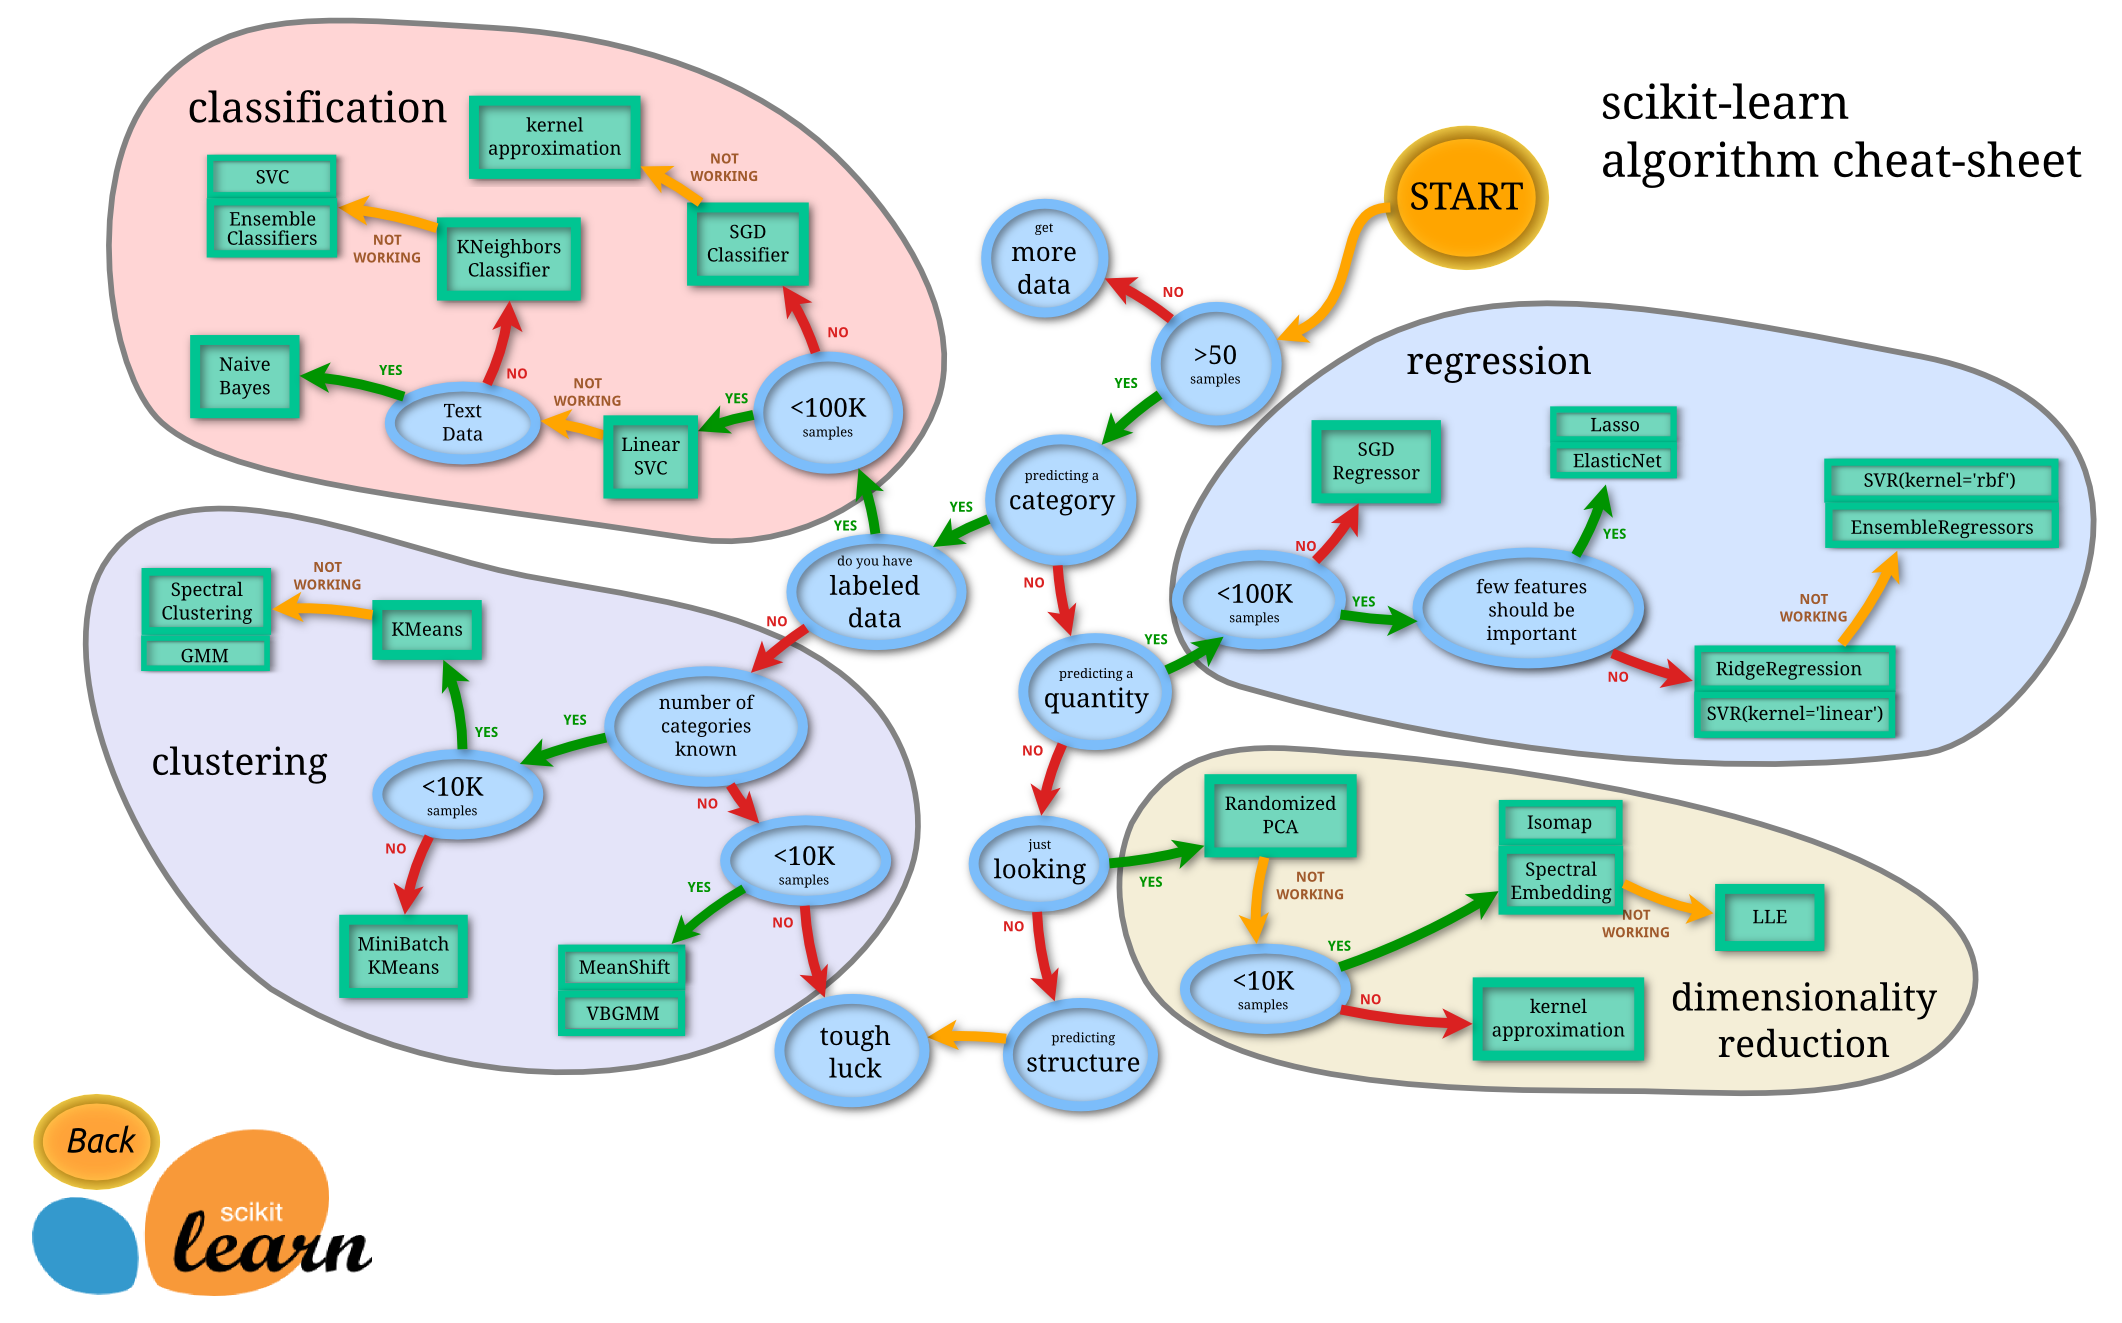

In [49]:
Image.open("ml_map.png")

# 3.1 Picking a model for a regression problem



In [50]:
# Importing Boston housing dateset( builtin dataset in sklearn)

# from sklearn.datasets import load_boston   # This method thorows and error load_boston` has been removed from scikit-learn since version 1.2.
# boston = load_boston()

from sklearn.datasets import fetch_openml
# Load the Boston housing dataset
boston= fetch_openml(name="boston", as_frame=True)
boston
# while this method is Fetch dataset from openml by name or dataset id.
# check out the documentation to study more.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [51]:
boston_data = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_data["target"]=pd.DataFrame(boston["target"])
boston_data

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [52]:
# See total samples
len(boston_data),boston_data.dtypes

(506,
 CRIM        float64
 ZN          float64
 INDUS       float64
 CHAS       category
 NOX         float64
 RM          float64
 AGE         float64
 DIS         float64
 RAD        category
 TAX         float64
 PTRATIO     float64
 B           float64
 LSTAT       float64
 target      float64
 dtype: object)

In [53]:
# lets try ridge regression
from sklearn.linear_model import Ridge

# np.random.seed(42)
#Create a data
x = boston_data.drop("target",axis=1)
y = boston_data["target"]

# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Instantiate the ridge model

model = Ridge()
model.fit(x_train,y_train)
print("Type of x_train:", type(x_train))
print("Type of y_train:", type(y_train))
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
# model.score(x_test.values,y_test.values)

Type of x_train: <class 'pandas.core.frame.DataFrame'>
Type of y_train: <class 'pandas.core.series.Series'>
Shape of x_train: (404, 13)
Shape of y_train: (404,)


In [54]:
model.score(x_test,y_test)

TypeError: can't multiply sequence by non-int of type 'float'

Here an error is thrown. The score() function in scikit-learn generally accepts input data in various formats. It can accept input data in the form of NumPy arrays, pandas DataFrames, lists, or other array-like structures that are compatible with scikit-learn's estimators.

In this particular scenario, it's possible that there was an inconsistency or requirement within the Ridge regression implementation that caused an issue when passing pandas DataFrames directly. By converting x_test and y_test to NumPy arrays using .values, you ensured that the input data were in a format that the Ridge regression model could handle without encountering any issues.

In [55]:
# converting test data into numpy array and evaluating the model
model.score(x_test.values,y_test.values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


0.7090891763702278

# How do we improve this score?
what if Ridge was not working. 
See the fig:https://scikit-learn.org/stable/_static/ml_map.png

In [56]:
# Lets try Random forest
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = boston_data.drop("target",axis=1)
y = boston_data["target"]

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#Instantiate the RF
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
#Evaluate
rf.score(x_test,y_test)

0.8654448653350507

In [57]:
# Compare the result
rf.score(x_test,y_test),model.score(x_test.values,y_test.values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


(0.8654448653350507, 0.6919153221460934)

# 3.2 Picking a model for a classification problem

see the fig: https://scikit-learn.org/stable/_static/ml_map.png

In [58]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

With the sklearn map is suggests LinearSVC

In [59]:
# Import linersvc
from sklearn.svm import LinearSVC

np.random.seed(42)

# Make the data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the SVC
svc = LinearSVC(max_iter=10000)
svc.fit(x_train,y_train)

# evalute
svc.score(x_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [60]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

There are only 2 classes, sometimes within 2 classes it can be accuracy of least 50% only (basically a coin toss). SO without fixing the hyperparameters improve the model if <50%.

See the map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Trying RandomForestclassifier

In [61]:
# Import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#Instantiate the RF
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
#Evaluate
rfc.score(x_test,y_test)

0.8524590163934426

What here I am trying to show or look is, even tho there are 2 classes : SVC may or maynot work as we have seen above, but randomforestclassifier can be the best at these kind of situations beacause RF is known for robustness and ability to find patterns

Now we might be wondoring why are we are skiping all these models and straight dive to Random forest
1. Yeah we can move to all of these models but can be time consuming
2. There's a titbit:
        2.1 If structured data : Ensemble Methods
        2.2 If unstructured data : Deep or transfer learning

# 4. Fit the model/algorithm and use it to make prediction


# 4.1 Fit the model
Using Classifier 

In [62]:
# Import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate the RF
rfc = RandomForestClassifier()

# Fit the model to the data
rfc.fit(x_train,y_train)

#Evaluate
rfc.score(x_test,y_test)

0.8524590163934426

In [63]:
x.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

fit(x_train,y_train):

When we pass x & y to fit, it will call a model to go all of the example of x(training data) and see what their corresponsing Y label is and fig out patterns that lead to different combinations of numbers, which leads to 1 as a label or 0 as the label.

The main crux is finding the patterns.

# 4.2 Prediction using the model 

Use the trained model to make prediction in a classifier model

Two ways to predict:

    1. Predict()
    2. predict_proba()

# 1. Predict() 
make prediction using `predict()`

In [65]:
# Use the trained model to make prediction
# predict()
rfc.predict(np.array([1,7,8,3,4]))   # doesnot work
# tryna give the input features as in dataaset

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [66]:
x_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
249   69    1   2       140   254    0        0      146      0      2.0   
104   50    1   2       129   196    0        1      163      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
193   60    1   0       145   282    0        0      142      1      2.8   
184   50    1   0       150   243    0        0      128      0      2.6   

     slope  ca  thal  
179      1   1     1  
228      1   0     3  
111      2   1     3  
246      1   2     3  
60       2   1     2  
..     ...  ..   ...  
249      1   3     3  
104      2   0     2  
300      1   2     3  
193      1   2     3  
184      1   0     3  

[61 rows x 13 columns]

In [67]:
rfc.predict(x_test) # this is the prediction

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [68]:
np.array(y_test)  # this is the truth

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [69]:
# Compare prediction vs truth lables to evalute the model
y_pred = rfc.predict(x_test)
np.mean(y_pred == y_test)  #technically the accuracy

0.8524590163934426

In [70]:
rfc.score(x_test,y_test)

0.8524590163934426

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

These 3 are technically the same

# 2. Predict_proba()
make prediction using `Predict_proba()`

In [72]:
# Predict_proba() return probabilities of each classification label
rfc.predict_proba(x_test[:7]) # here we have 2 classes

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64]])

In [73]:
rfc.predict(x_test[:7])

array([0, 1, 1, 0, 1, 1, 1])

Now compare these two predictions.
Predict() gives the 1 label either the heart disease is yes or not. But the Predict_proba gives the probility of getting heart disease or not.

Compare each index array.

# 1 Predict 

In Regression model

In [74]:
# PRediction can also be done in regression model
boston_data

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

In [75]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Make the data
x = boston_data.drop("target",axis=1)
y = boston_data["target"]

# split the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the model

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

# predict
y_preds = rfr.predict(x_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [76]:
np.array(y_test[:10])

/var/folders/tg/lmwvqpj52v571r3rpp5rs_900000gn/T/ipykernel_47043/25245348.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  np.array(y_test[:10])


array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [77]:
# compare the prediction with truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

On avg for every single prediction the prediction is 2.13 away from the target(label)

Next section is on Evaluating the model

# 5. Evaluating a model (Classification)
https://scikit-learn.org/stable/modules/model_evaluation.html


There are 3 different APIs for evaluating the quality of a model’s predictions:

1. Estimator score method: .
2. Scoring parameter: 
3. Metric functions:

In [78]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the model
rfc = RandomForestClassifier()

# fit the model 
rfc.fit(x_train,y_train)


RandomForestClassifier()

# 5.1 Estimator score method

This method is already seen, We are familier to this.

In [79]:
rfc.score(x_train,y_train)

1.0

In [80]:
rfc.score(x_test,y_test)

0.8524590163934426

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Make the data
x = boston_data.drop("target",axis=1)
y = boston_data["target"]

# split the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the model

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [82]:
rfr.score(x_test,y_test)

0.8654448653350507

Here we see the accuracy for both Classifier and Regression model is almost the same. But the score function in every machine learning model has some kind of default evaluation metrices.

In Regression Model score : return the coefficient of determination of the prediction

In Classification model score : return the mean accuracy on the given test data and labels.


# 5.2. Scoring parameter: 

Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

In [273]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the model
rfc = RandomForestClassifier()

# fit the model 
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [274]:
rfc.score(x_test,y_test)

0.8524590163934426

In [275]:
cross_val_score(rfc,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

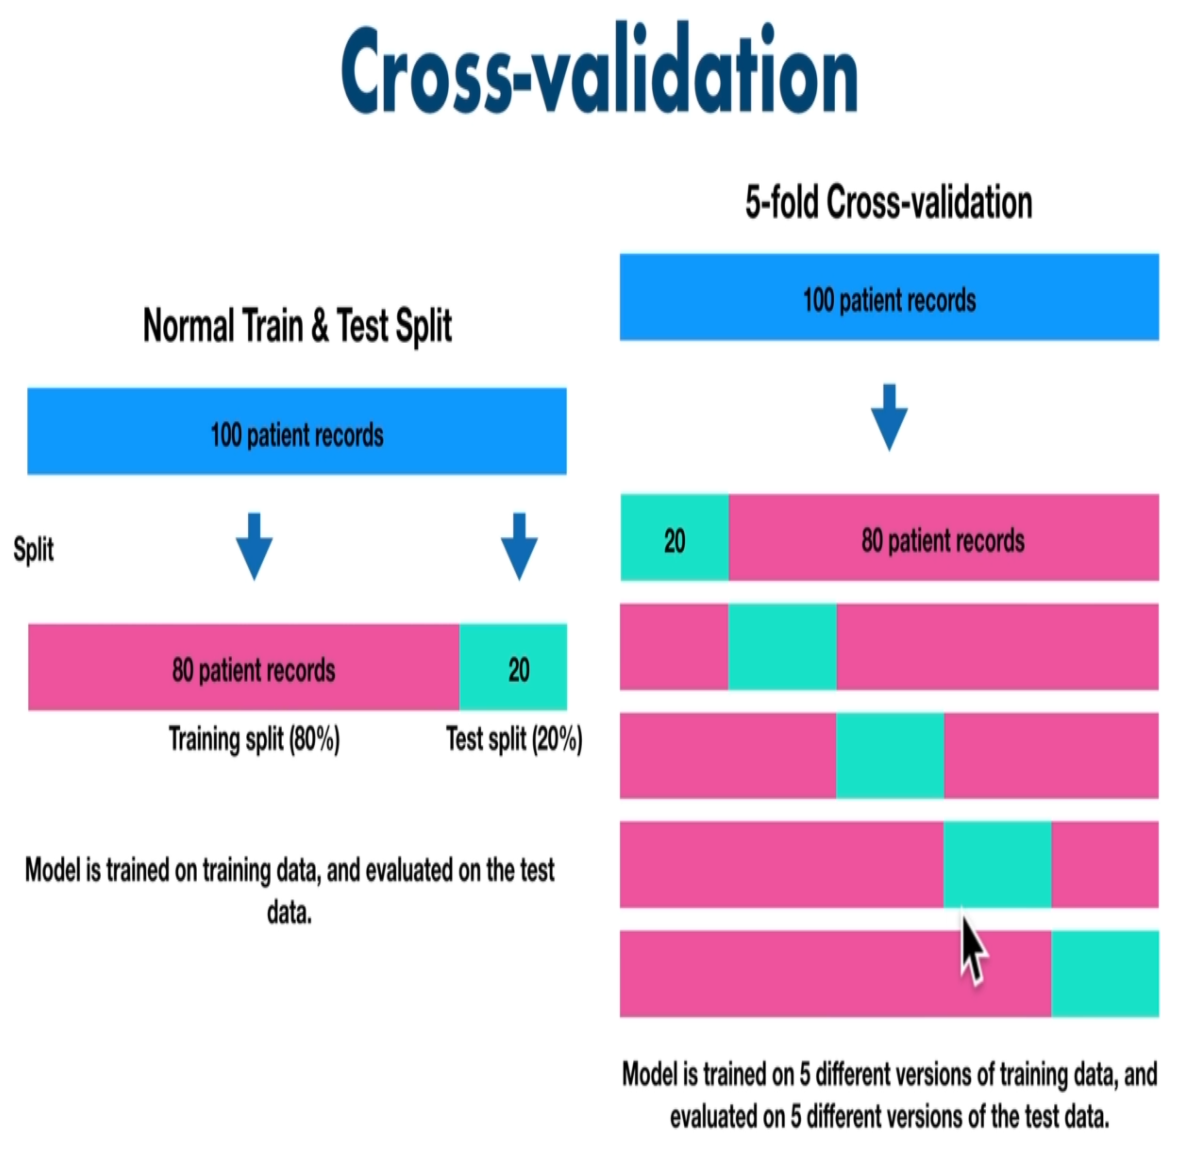

In [276]:
Image.open("crossvalidation.png")

Here it is 5-fold cross validation(k fold validation) i.e cv=5
Here it does 5 different split as shown in fig.
So the array of accuracy is shown with each split.
This is important because there might be any random split that gives an accuracy.

In [277]:
# taking score and mean of cross validation of 10 splits
np.random.seed(42)
rfc.score(x_test,y_test),np.mean(cross_val_score(rfc,x,y,cv=10))

(0.8524590163934426, 0.8183870967741935)

Original score > Cross validation score
Even though Cross validation score is low we prefer the cross validation score.



Noticed??? we haven't used any `scoring`parameter at all
It default to none: hit shift tab

In [280]:
# scoring parameter is none by default
cross_val_score(rfc,x,y,cv=10,scoring=None)
# If `None`, the estimator's default scorer (if available) is used.

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.83333333,
       0.83333333, 0.73333333, 0.83333333, 0.76666667, 0.83333333])

Our default scoring parameter of classifier = mean accuracy 
i.e `rfc.score()`

# Evaluation Metrics 
1. Accuracy
2. Area under ROC curver
3. Confusion Matrix
4. Classification report

We might be thinking why we need all these evaluation metrics. We can just find the better accuracy only. But there's the value of all these metrics.

# 1.  Accuracy

In [96]:
heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

rfc = RandomForestClassifier()

cross_val = cross_val_score(rfc,x,y,cv=5)

In [91]:
np.mean(cross_val)

0.8248087431693989

In [94]:
print(f"The cross validation score of heart disease : {np.mean(cross_val)*100:.2f}%")

The cross validation score of heart disease : 82.48%


# 2. Area Under ROC(receiver operating characteristic) curve

ROC curves are a comparision of a model's true positive rate(tpr) vs model's false positive rate(fpr) .

• True Positive = model predicts 1 when truth is 1

• False Positive = model predicts 1 when truth is 0

• True Negative = model predicts 0 when truth is 0

• False negative = model predicts 0 when truth is 1

In [ ]:
# Create train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [109]:
from sklearn.metrics import roc_curve

rfc.fit(x_train,y_train)
# make prediction with probabilities
y_prob = rfc.predict_proba(x_test)
y_prob[:10],y_prob.shape

(array([[0.91, 0.09],
        [0.43, 0.57],
        [0.42, 0.58],
        [0.76, 0.24],
        [0.22, 0.78],
        [0.19, 0.81],
        [0.31, 0.69],
        [0.96, 0.04],
        [0.97, 0.03],
        [0.46, 0.54]]),
 (61, 2))

In [128]:
y_prob_positive = y_prob[:,1]
y_prob_positive[:10]

array([0.09, 0.57, 0.58, 0.24, 0.78, 0.81, 0.69, 0.04, 0.03, 0.54])

In [133]:
# calculate fpt, tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_prob_positive)

# check false positive rates
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276])

Now these array doesn't make any sense.
Let's create a ROC plot

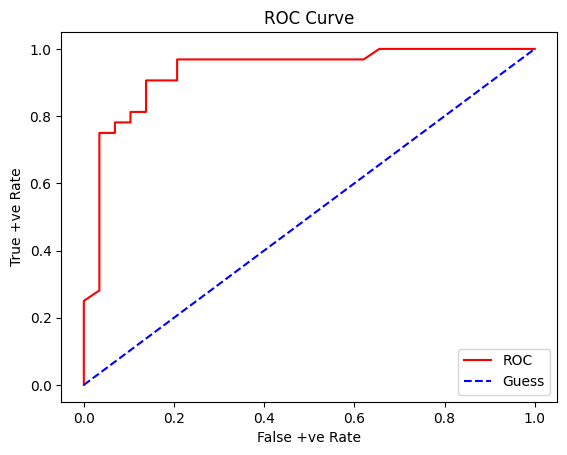

In [157]:
# Create a function to plot roc curve

def plot_roc(fpr,tpr):
    # Plots fpr vs tpr
    plt.plot(fpr,tpr,color="red",label="ROC")
    
    # plot line with no predictive power i.e baseline
    plt.plot([0,1],[0,1],color="b",linestyle="--",label="Guess")
    
    # Customize the plot
    plt.title("ROC Curve")
    plt.xlabel("False +ve Rate")
    plt.ylabel("True +ve Rate")
    plt.legend()
    
plot_roc(fpr,tpr)

Our model is far better than guessing(Blue line)

In [159]:
from sklearn.metrics import roc_auc_score
# Area under curve
roc_auc_score(y_test,y_prob_positive)

0.9321120689655172

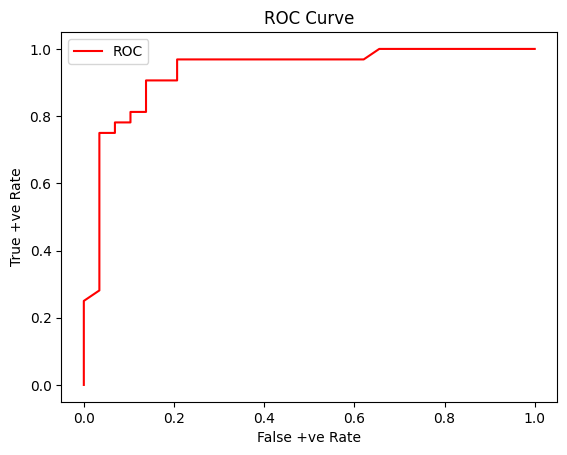

In [160]:
# Area under curve
def plot_roc(fpr,tpr):
    # Plots fpr vs tpr
    plt.plot(fpr,tpr,color="red",label="ROC")
    
    # plot line with no predictive power i.e baseline
#     plt.plot([0,1],[0,1],color="b",linestyle="--",label="Guess")
    
    # Customize the plot
    plt.title("ROC Curve")
    plt.xlabel("False +ve Rate")
    plt.ylabel("True +ve Rate")
    plt.legend()
    
plot_roc(fpr,tpr)

 Guess where the most ideal ROC goes?? A perfect ROC and AUC curve
 

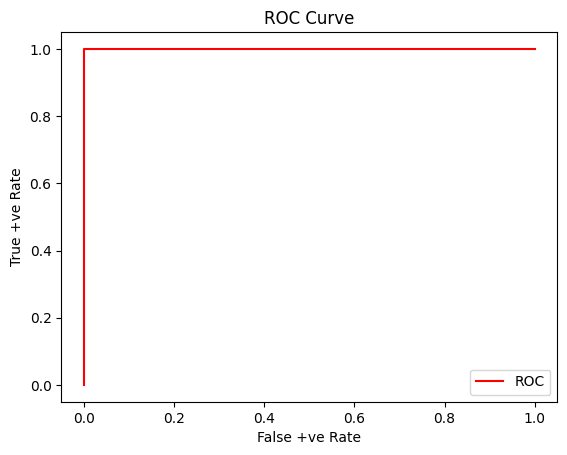

In [162]:
# A perfect ROC and AUC curve
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

THis is the perfect ROC curve

In [164]:
# Perfect AUC
roc_auc_score(y_test,y_test)

1.0

# 3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predict and the actual label it was supposded to preidct.
In essence, giving you an idea of where the model is getting confused.

In [166]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[25,  4],
       [ 3, 29]])

In [167]:
pd.crosstab(y_test,y_pred,rownames=["Actual"],
           colnames=["Predicted Lables"])

Predicted Lables   0   1
Actual                  
0                 25   4
1                  3  29

This is the description of Confusion Matrix consisting of True +ve , True -ve ,False +ve and False -ve.

The Diagonal is actually the correct prediction

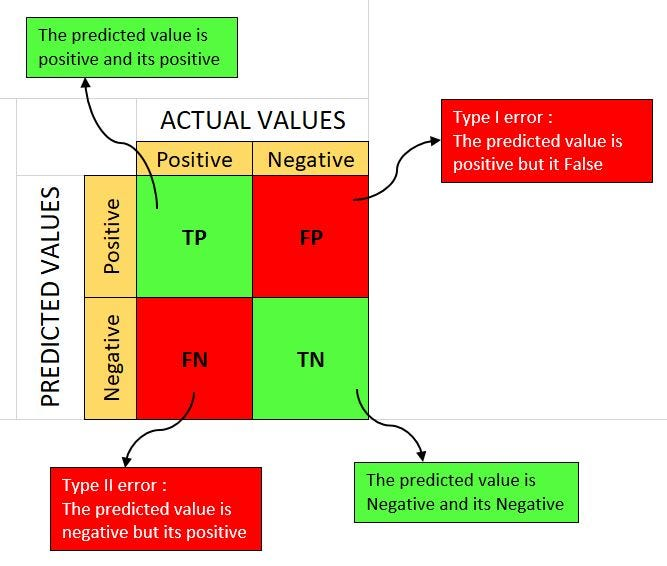

In [169]:
Image.open("confusion_matrix.jpg")

<AxesSubplot: >

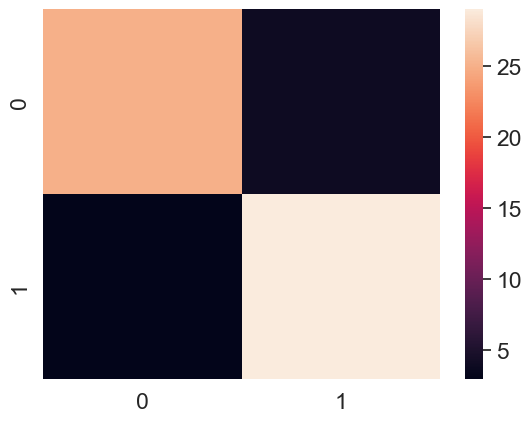

In [172]:
# Make our COnfusion matrix more visual using heatmap

import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

#create confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)

# plot heatmap
sns.heatmap(conf_mat)

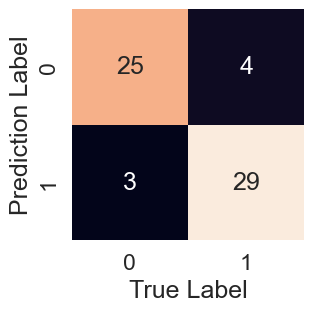

In [173]:
def plot_conf_mat(conf_mat):
    # Plots confusion matrix using seaborn heatmap()
    fig,ax = plt.subplots(figsize=(3,3))
    ax =sns.heatmap(conf_mat,
                   annot = True,
                   cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Prediction Label")
   
plot_conf_mat(conf_mat)

# 4. Classification Report

In [175]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



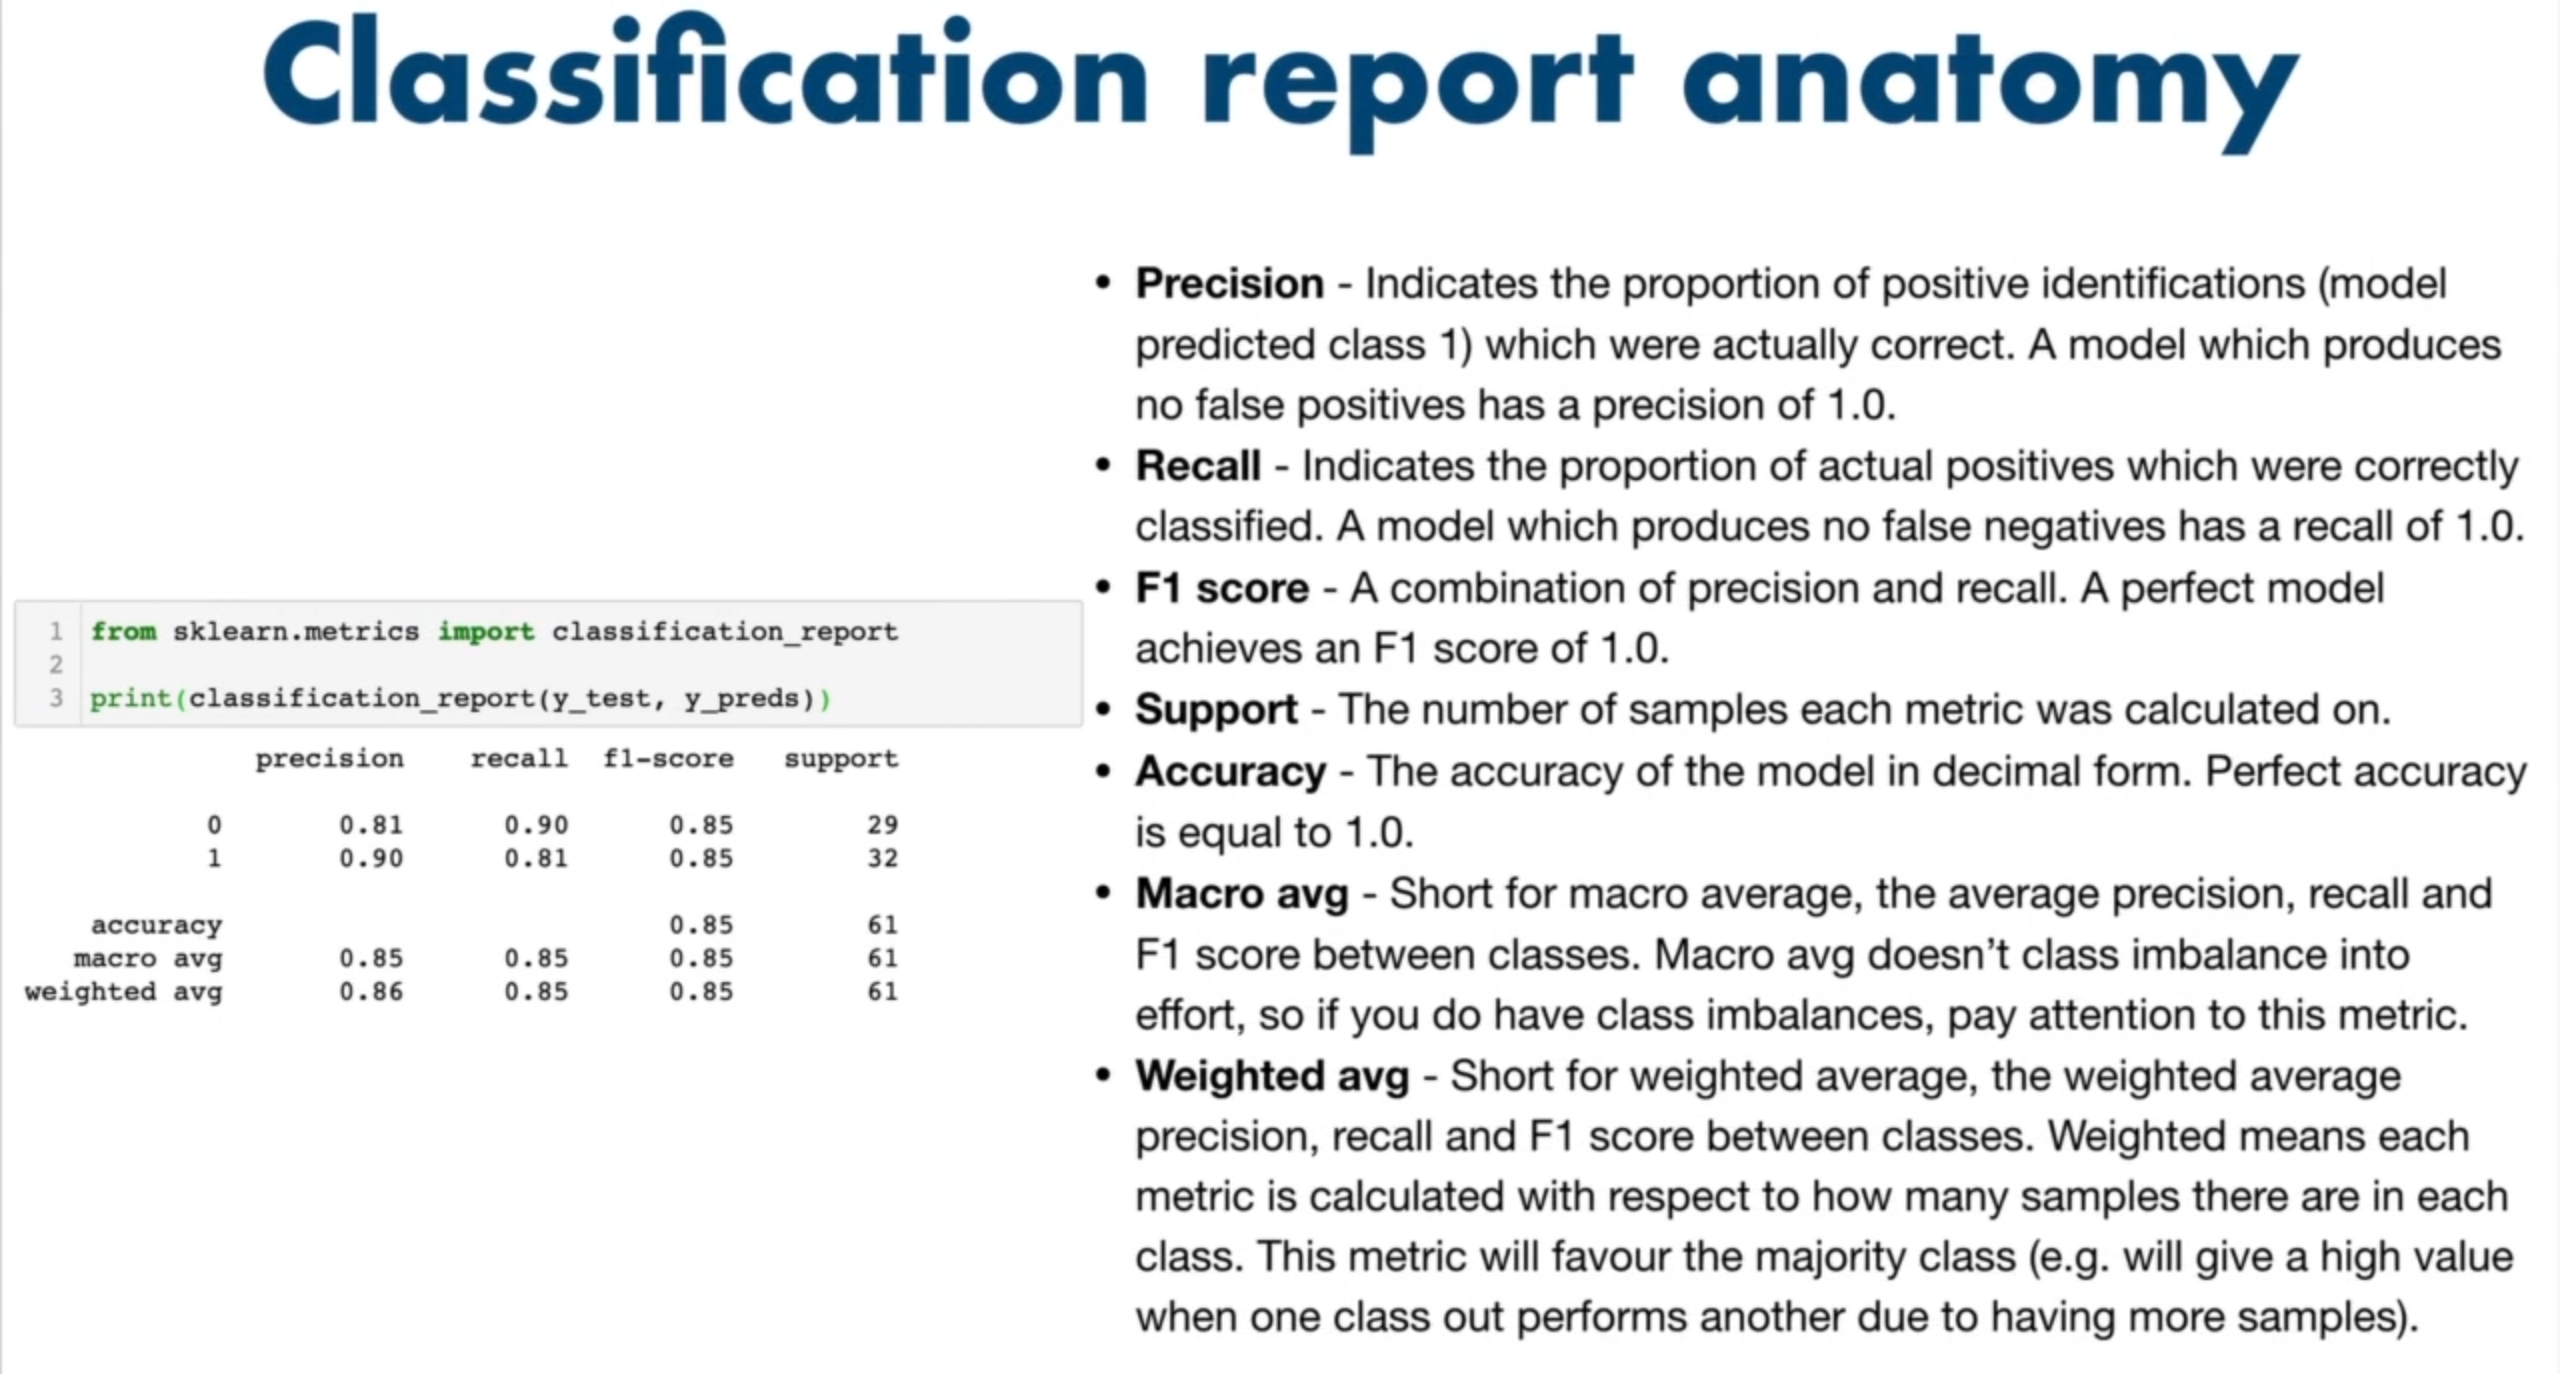

In [176]:
Image.open("classification_report.png")

Here we have done a lot of evaluating model. WHen should I use each of there rather just use accuracy.

No! Don't rely on this trap.


For example there are 10000 people and 1 of these have disease.Now asked to build model who has a disease.

In [182]:
# Where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0]=1  # only 1 positive case

disease_pred = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_pred,
                                  output_dict=True))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

0.0  1.0  accuracy     macro avg  weighted avg
precision     0.99990  0.0    0.9999      0.499950       0.99980
recall        1.00000  0.0    0.9999      0.500000       0.99990
f1-score      0.99995  0.0    0.9999      0.499975       0.99985
support    9999.00000  1.0    0.9999  10000.000000   10000.00000

To summarize Classification Metrics:
• **Accuracy** is a good measure to start with if all class are balanced(e.g same amount of samples which are l    labelled woth 0 or 1)
• **Precision & Recall** become more important when classes are imbalanced.
• If false +ve prediction are worse than false -ve , aim for **higher precision**.
• If false -ve prediction are worse than false +ve , aim for **higher recall**.
• **F1-Score** is a combination of precision & Recall

# 5. Evaluating a model (Regression)
https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (R-squared) or coefficient of determination
2. Mean Ab.error(MAE)
3. Mean Squared error(MSE)


In [194]:
boston_data.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  target  
0  396.90   4.98    24.0  
1  396.90   9.14    21.6  
2  392.83   4.03    34.7  
3  394.63   2.94    33.4  
4  396.90   5.33    36.2

# 1. R^2
Compares your models predictions to the mean to the targets. Values can range from -ve infinity ( a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model prefectly predicts a range of numbers it's R^2 value would be 1.

1 - SSR/SST

In [210]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
# Data ready
x = boston_data.drop("target",axis=1)
y = boston_data["target"]

# Split the data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

# instantiate the model

rfr = RandomForestRegressor()

#fit the model
rfr.fit(x_train,y_train)

rfr.score(x_test,y_test)

0.8654448653350507

In [211]:
from sklearn.metrics import r2_score

#fill an array of mean
y_test_mean = np.full(len(y_test),np.mean(y_test))
y_test_mean[:10]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [212]:
r2_score(y_test,y_test_mean)

0.0

In [213]:
r2_score(y_test,y_test)

1.0

# 2.Mean Absolute Error(MAE)

It is the Avg of the absolute difference between predictions and actual values. It gives you an idea how wrong your model's predictions are.

In [260]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test.values)  # WHy? go to Cel[54]

mae = mean_absolute_error(y_test,y_pred)
mae

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


3.010809874151479

This shows on avg 3.021 away from the acutal value

In [261]:
df = pd.DataFrame(data={"Actual Values":y_test,
              "Predicted Values":y_pred})
df["Difference"] = df["Predicted Values"] - df["Actual Values"]
df

Actual Values  Predicted Values  Difference
173           23.6         28.539145    4.939145
274           32.4         35.370522    2.970522
491           13.6         12.602099   -0.997901
72            22.8         24.732468    1.932468
452           16.1         18.573825    2.473825
..             ...               ...         ...
412           17.9         -0.138403  -18.038403
436            9.6         14.756348    5.156348
411           17.2         15.380704   -1.819296
86            22.5         21.909789   -0.590211
75            21.4         23.327067    1.927067

[102 rows x 3 columns]

# 3. Mean Squared Error(MSE)

In [270]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

22.59301496075633

Is will always be higher because it get squared.
It takes the square of the difference of the mean.

In [271]:
# Calculate MSE

squared = np.square(df["Difference"])
squared.mean()

22.59301496075633

# Which regression metric should you use?

**R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing.
Generally, the closer your **R2** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

• **MAE** gives a better indication of how far off each of your model's predictions are on average.

• As for **MAE or MSE**, because of the way **MSE** is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

• Pay more attention to **MAE**: When being 10,000 off is twice as bad as being 5,000 off.

• Pay more attention to **MSE**: When being 10,000 off is more than twice as bad as being 5,000 off.

**NOTE: Minimize MAE & MSE but Maximize R2**

# 5.2 Scoring Parameter

We didn't do about the scoring paramer in previous 5.2 section of evaluation model

So finally using `scoring` parameter

Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

In [281]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# data ready
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

rfc = RandomForestClassifier()

In [285]:
np.random.seed(42)
cv_acc = cross_val_score(rfc,x,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [286]:
# Cross val mean
np.mean(cv_acc)

0.8248087431693989

In [288]:
np.random.seed(42)
cv_acc = cross_val_score(rfc,x,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.8248087431693989

In [289]:
# Precision

cv_precision = cross_val_score(rfc,x,y,cv=5,scoring="precision")
cv_precision.mean()

0.8085601538512754

In [290]:
# Recall

cv_recall = cross_val_score(rfc,x,y,cv=5,scoring="recall")
cv_recall.mean()

0.8424242424242424

In [291]:
# F1-score

cv_f1 = cross_val_score(rfc,x,y,cv=5,scoring="f1")
cv_f1.mean()

0.841476533416832

How about regression model????

In [294]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_data.drop("target",axis=1)
y = boston_data["target"]

rfr = RandomForestRegressor()

In [297]:
# R2
np.random.seed(42)
cv_r2 = cross_val_score(rfr,x,y,cv=5,scoring=None)
cv_r2.mean()

0.6243870737930857

In [298]:
np.random.seed(42)
cv_r2 = cross_val_score(rfr,x,y,cv=5,scoring="r2")
cv_r2.mean()

0.6243870737930857

In [307]:
# MAE
np.random.seed(42)
cv_mae = cross_val_score(rfr,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae.mean()

-3.0312352552902335

In [308]:
# MSE
np.random.seed(42)
cv_mse = cross_val_score(rfr,x,y,cv=5,scoring="neg_mean_squared_error")
cv_mse.mean()

-21.261442856882137

# 5.3 Metric Function


**Classfication Evaluation Function**

In [309]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(23)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

# make prediction
y_pred = rfc.predict(x_test)

# evaluate classifier

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Presicion: {precision_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test,y_pred)}")
print(f"F1-score: {f1_score(y_test,y_pred)}")

Accuracy: 0.8032786885245902
Presicion: 0.7878787878787878
Recall: 0.8387096774193549
F1-score: 0.8125


**Regression Evaluation Function**

In [314]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_data.drop("target",axis=1)
y = boston_data["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

rfr = RandomForestRegressor()

# Train model
rfr.fit(x_train,y_train)

# Make some prediction
y_pred = rfr.predict(x_test)
# evaluate the model

print(f"R2: {r2_score(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

R2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


But we might get hit by how do we improve this numbers , make it better .
We have been using random seed , same number for accuracy,recall,f1,r2,mae and mse. Well that what we do in next section

# 6. Improve the model

First prediction = baseline predictions
First model = baseline model

1. **From data perspective**:
    * Could we collect more data?(Generally the more data,the better)
    * Could we improe our data???
    
    
2. **From our model perspective**:
    * Is there better model we can use? `(simple model vs complex model)`
    * Could we improve current model?? Can we improve the hyperparameters
    
**Note** : **Parameters & Hyperparameters**

`Parameters` : Pattern in the data that ML finds are data parameters. A ML model finds patterns on its own.

`Hyperparameters` : Hyperparameters are setting on a model we can adjust to(Potentially) improve its ability to find patterns.

In [315]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

These are the hyperparameters we can adjust. 
* For RandomForestClassifier:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Let us consider this example:
    Adjusting hyperparameter is same as adjusting `temperature`.

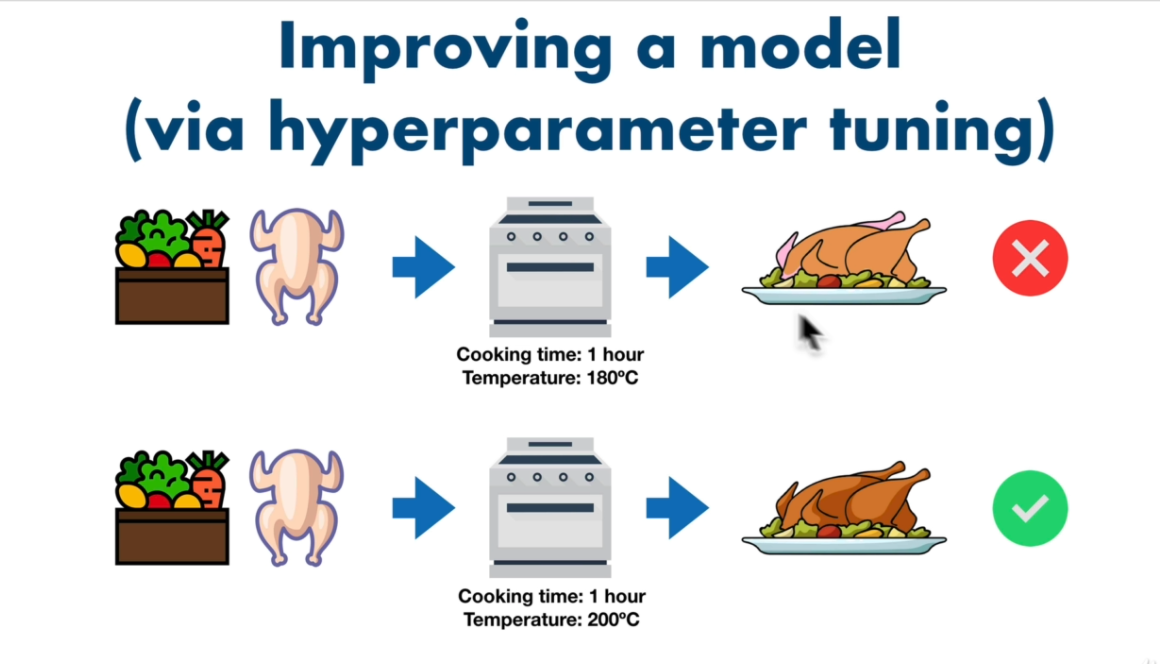

In [316]:
Image.open("hyperparameter.png")

**NOTE**:
Same thing goes with our Machine Learning model. If we just used RFC as it is as it came out of the box at default parametetrs we get 85% accuracy. But we can adjust those parameters so that our model finds better than what it does in default .

## Three ways to adjust Hyperparameters:
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV

# 6.1 Tuning Hyperparameters By Hand

So far we have talked about dealing about training and testing data set and model gets trained in training set and finds patterns and gets evuauated using testing set. 

**Hyperparametrs** are introduces a 3rd-set : a **validation set.**

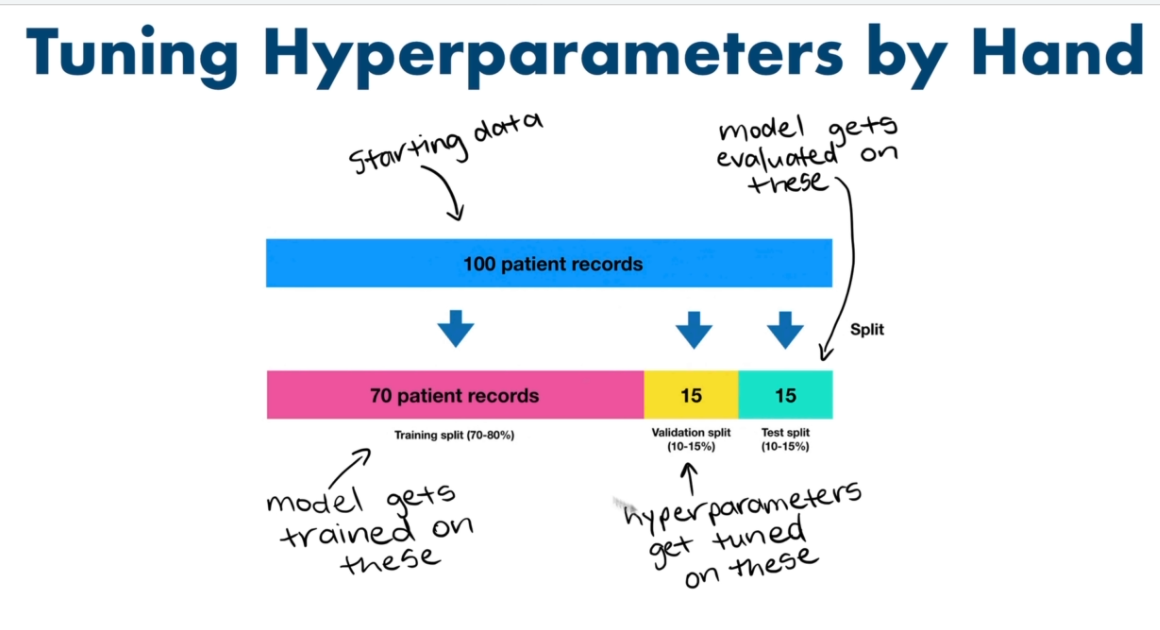

In [318]:
Image.open("hyperparameter_by_hand.png")

Usually model gets train and gets evaluated in testing data. But now our model gets evaluated by those validation split i.e hyperparameters get tuned in validation split called as  **hyperparameter tuning**.

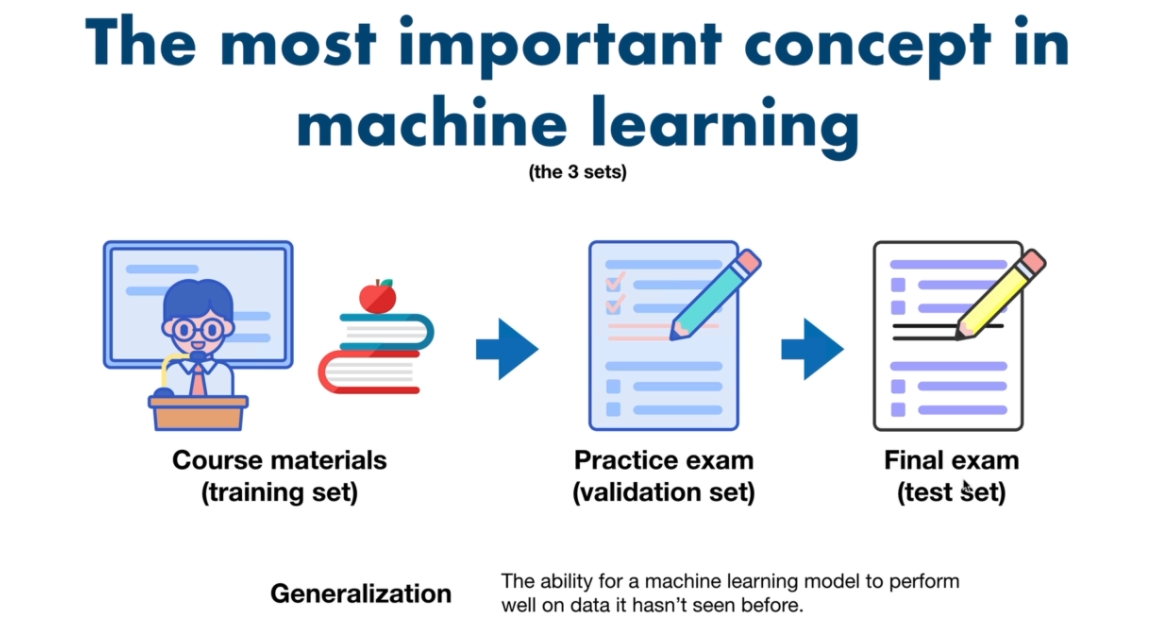

In [320]:
Image.open("Most_imp_ML.png")

**Lets make 3 sets: Training, Validation and Test**

In [324]:
rfc.get_params()
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# We are going to adjust following:

**`max_depth`**

**`max_features`**

**`min_samples_leaf`**

**`min_samples_split`**

**`n_estimators`**

In [340]:
# Create function:
def evaluate_pred(y_true,y_pred):
    # Performs Evaluation comparison on y_true labels vs y_pred labels on classification
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1  = f1_score(y_true,y_pred)
    pred_metric = {"Accuracy":accuracy,
                  "precision":precision,
                  "recall":recall,
                  "F1-score":f1,
                    }
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    
    return pred_metric

In [342]:
heart_disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [343]:
import warnings
warnings.filterwarnings('ignore')

In [344]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(32)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1) # making sure all data are mixed or shuffled

#  data ready:
x = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

#split the data into train, validation and test:
train_split = round(0.7*len(heart_disease_shuffled)) # 70% data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled))  # 15% data
x_train,y_train = x[:train_split],y[:train_split]  
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

#baseline prediction
y_pred = rfc.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_pred(y_valid,y_pred)
baseline_metrics

Accuracy: 0.9111111111111111
Precision: 0.8846153846153846
Recall: 0.9583333333333334
F1-score: 0.9199999999999999


{'Accuracy': 0.9111111111111111,
 'precision': 0.8846153846153846,
 'recall': 0.9583333333333334,
 'F1-score': 0.9199999999999999}

# 6.2 Tuning Hyperparameters By RandomizedSearchCV

In [355]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4],
        "max_features":["auto","sqrt"]}

np.random.seed(23)

#split x & y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instantiate RFC

rfc = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCVabs
rs_rfc = RandomizedSearchCV(estimator=rfc,
                           param_distributions=grid,
                           n_iter=10, #no of model to try
                           cv=5,
                           verbose=2)

# fit the RandomizedSearchCV version of rfc

rs_rfc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [356]:
rs_rfc.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

# 7. Save and load a trained model


# 8. Putting it all together